In [1]:
import numpy as np

# Multi-dimensional version

def rk_diff_solver_vect (f, x0, y0, h, n):
    # Intiatite arrays    
    rk_x = [x0 + i*h for i in range(n)]
    rk_y = [y0 if i == 0 else [0]*len(y0) for i in range(n)]
    
    rk_y = np.asarray(rk_y)    
    
    #Calculate solution using RK algorithm
    for i in range(n-1):
        k1 = h*f(rk_x[i], rk_y[i])
        k2 = h*f(rk_x[i] + h/2.0, rk_y[i] + 0.5*k1)
        k3 = h*f(rk_x[i] + h/2.0, rk_y[i] + 0.5*k2)
        k4 = h*f(rk_x[i] + h, rk_y[i] + k3)    
        
        rk_y[i+1] = rk_y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Return solution
    return rk_x, rk_y  

In [2]:
# Intial conditions in solar plane coordinates
r0 = [0.3170787, -1.887907, 0.2396305]
v0 = [0.008180196, 0.01188029, 0.0006081217]


# New Coordinates

# New x unit vector is in r0 direction.
u_x = r0/np.dot(r0,r0)**0.5

# New z unit vector is vector perpendicular to r0 and v0
u_z = np.cross(r0,v0)
u_z /= np.dot(u_z,u_z)**0.5

# New y vector is perpendicuar to new x,z (automatically a unit vector).
u_y = np.cross(u_x,u_z)

# Get coefficients of v0 in new coordinate system 
v0_new_x =  np.dot(v0,u_x)
v0_new_y = np.dot(v0, u_y)

v0_new = np.asarray([v0_new_x, v0_new_y])
print(v0_new)
print(np.dot(v0_new,v0_new))
print(np.dot(v0,v0))

[-0.01020552 -0.01021147]
0.000208426709085
0.000208426709085


1.92928860443 0.0197008692866


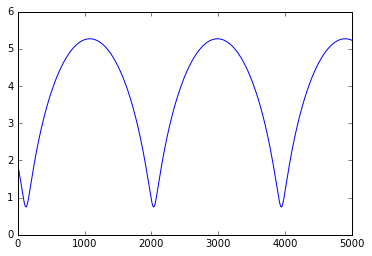

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Let m =1. Get initial r and l:
m = 1.
r = np.linalg.norm(r0)
l = np.linalg.norm( np.cross(r0, v0))
pr_0 = np.dot(v0,u_x)

# k = GM in units of AU^3/day^2
k = 2.9591392*10**(-4)

# Differential equation function
K = lambda t, u: np.asarray(
    [u[2]/m, l/(m*u[0]**2), -k/u[0]**2 + (l**2)/(m*u[0]**3)]
    )


max_t = 5000
n = 100
000
h = max_t/n

# u[:,0] = r
# u[:,1] = th
# u[:,2] = p_r

t, u = rk_diff_solver_vect(K, 0, np.asarray([r, 0., pr_0]), h,  n)
plt.plot(t, u[:,0])
print(r, l)

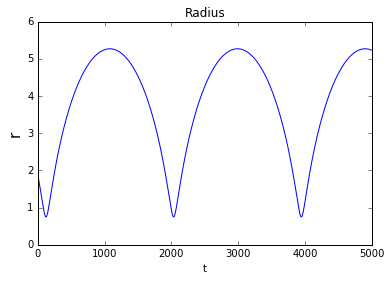

In [9]:
plt.plot(t, u[:,0])
plt.xlabel("t")
plt.ylabel("r", fontsize= 15)
plt.title("Radius")


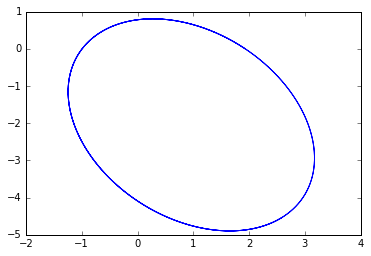

In [5]:
plt.plot(u[:,0]*np.cos(u[:,1]), u[:,0]*np.sin(u[:,1]))

In [16]:
from scipy.signal import argrelextrema

mins = argrelextrema(u[:,0], np.less)

(0, 2.5)

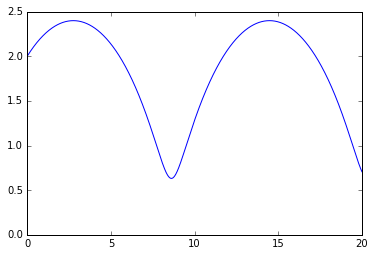

In [16]:

# Choose units such that:
m = 1.
l = 1.
k = 1. 

max_t = 20
n = 10000
h = max_t/n

t, u = rk_diff_solver_vect(K, 0., np.asarray([2, 0., 0.3]), h, n)

plt.plot(t, u[:,0])
plt.ylim(0, 2.5)

In [126]:
0.5*(v0_new_x**2 + v0_new_y**2) - k/r**2

2.471264642395789e-05

In [92]:
np.dot(r0,r0)**0.5

1.9292886044272746

In [108]:
((1.327124*10**(20))*(1.157*10**-5))

1535482468000000.2

In [106]:
(6.6846*10**(-12))**3*1535482468000000.2

4.586391627019713e-19

In [20]:
np.absolute(np.cross(r0, v0))

array([ 0.00399496,  0.0017674 ,  0.01921044])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Let m =1. Get initial r and l:
m = 1.
r = 1.9292886044272746
l = np.absolute( np.cross(r0, v0))
pr_0 = np.dot(r0,u_x)

# k = GM in units of AU^3/day^2
k = 2.9591392*10**(-4)

# Differential equation function
K = lambda t, u: np.asarray(
    [u[2]/m, l/(m*u[0]**2), -k/u[0]**2 + (l**2)/(m*u[0]**3)]
    )


max_t = 2000
n = 10000
h = max_t/n

# u[:,0] = r
# u[:,1] = th
# u[:,2] = p_r

t, u = rk_diff_solver_vect(K, 0, np.asarray([r, 0., pr_0]), h,  n)
